In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#skip first row as it is a filler row
train = pd.read_csv(r"C:\Users\luwil\Documents\misc_data\training_loan_data.csv", header =1)

In [3]:
# --- BASIC INFO ---
print("Shape:", train.shape)
print("\nColumns:", train.columns.tolist())
print("\nInfo:")
print(train.info())
missing_pct = train.isna().mean().sort_values(ascending=False) * 100
print("\nMissing values (% of rows) per column:")
print(missing_pct)

Shape: (199121, 23)

Columns: ['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'emp_length', 'home_ownership', 'annual_inc', 'desc', 'purpose', 'percent_bc_gt_75', 'bc_util', 'dti', 'inq_last_6mths', 'mths_since_recent_inq', 'revol_util', 'total_bc_limit', 'mths_since_last_major_derog', 'tot_hi_cred_lim', 'tot_cur_bal', 'application_approved_flag', 'internal_score', 'bad_flag']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199121 entries, 0 to 199120
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           199121 non-null  int64  
 1   member_id                    189457 non-null  float64
 2   loan_amnt                    199121 non-null  int64  
 3   term                         189457 non-null  object 
 4   int_rate                     189457 non-null  object 
 5   emp_length                   181531 non-null  object 
 6   home_ownership      

In [4]:
train.head()

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,application_approved_flag,internal_score,bad_flag
0,10000001,11983056.0,7550,36 months,16.24%,3 years,RENT,28000.0,NaN,debt_consolidation,...,0.0,17.0,72%,4000.0,NaN,3828.953801,5759.0,1,99,0.0
1,10000002,12002921.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Borrower added on 12/31/13 > Combining high ...,debt_consolidation,...,0.0,8.0,61.20%,35700.0,NaN,34359.940730,114834.0,1,353,0.0
2,10000003,11983096.0,12000,36 months,10.99%,4 years,RENT,60000.0,Borrower added on 12/31/13 > I would like to...,debt_consolidation,...,1.0,3.0,24%,18100.0,NaN,16416.617760,7137.0,1,157,0.0
3,10000004,12003142.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,1.0,3.0,54.60%,42200.0,NaN,38014.149760,799592.0,1,365,0.0
4,10000005,11993233.0,12000,36 months,13.53%,10+ years,RENT,40000.0,NaN,debt_consolidation,...,0.0,17.0,68.80%,7000.0,53.0,6471.462236,13605.0,1,157,0.0


In [ ]:
numeric_cols = train.select_dtypes(include=["number"]).columns
categorical_cols = train.select_dtypes(exclude=["number"]).columns

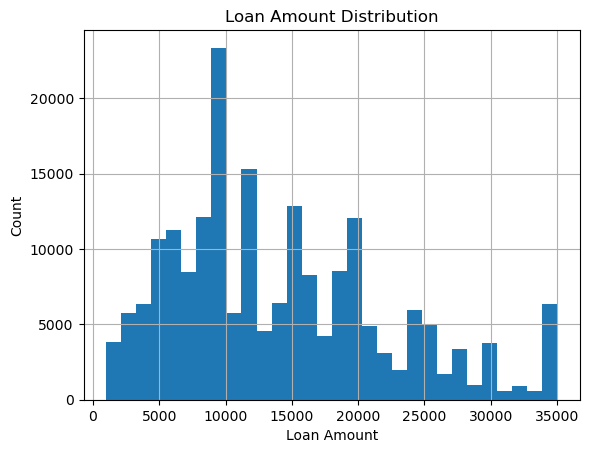

In [5]:
# --- SIMPLE VISUALS ---
# Histogram of loan amount
if "loan_amnt" in train.columns:
    train["loan_amnt"].dropna().astype(float).hist(bins=30)
    plt.title("Loan Amount Distribution")
    plt.xlabel("Loan Amount")
    plt.ylabel("Count")
    plt.show()

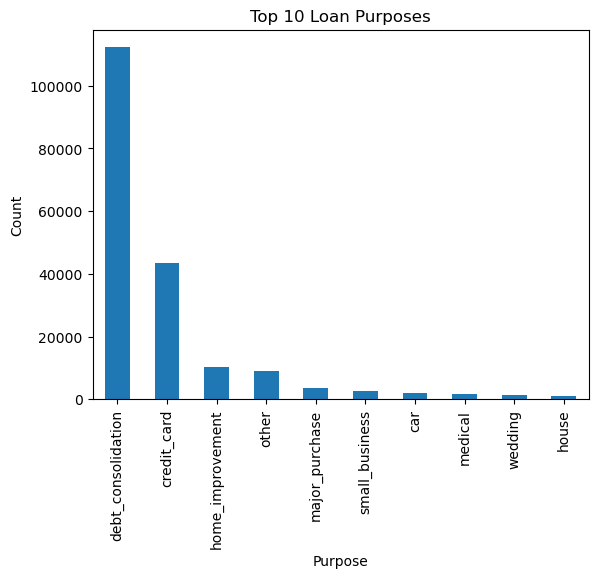

In [6]:
# Bar chart of loan purpose
if "purpose" in train.columns:
    train["purpose"].value_counts().head(10).plot(kind="bar")
    plt.title("Top 10 Loan Purposes")
    plt.xlabel("Purpose")
    plt.ylabel("Count")
    plt.show()

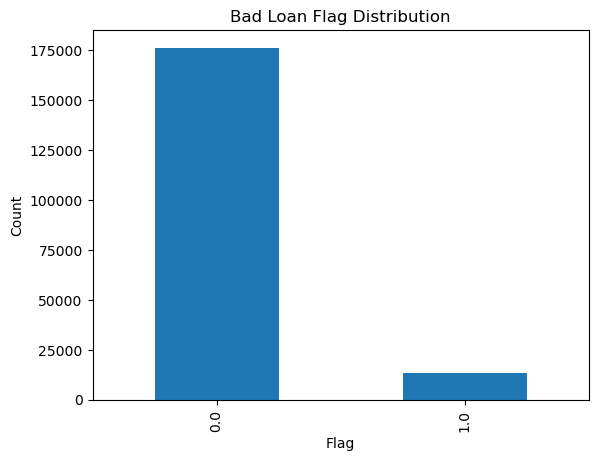

In [7]:
if "bad_flag" in train.columns:
    train["bad_flag"].value_counts().plot(kind="bar")
    plt.title("Bad Loan Flag Distribution")
    plt.xlabel("Flag")
    plt.ylabel("Count")
    plt.show()